In [279]:
# Import Libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [280]:
# read data
df=pd.read_csv('headbrain.csv')

In [281]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [288]:
# Declare dependent variable(Y) and independent variable(X)

# X=df['Head Size(cm^3)'].values
# Y = df['Brain Weight(grams)'].values

def load_data(filepath = "../calibration_results_reasonable.p"):
    import pickle
    [
        P_Ll,
        P_Cl,
        P_2l,
        V_1l,
        V_2l,
        P_Lr,
        P_Cr,
        P_2r,
        V_1r,
        V_2r,
            ]=pickle.load(open( filepath, "rb" ) )

    P_Ll = np.array(P_Ll)
    P_Cl = np.array(P_Cl)
    P_2l = np.array(P_2l)
    V_1l = np.array(V_1l)
    V_2l = np.array(V_2l)

    P_Lr = np.array(P_Lr)
    P_Cr = np.array(P_Cr)
    P_2r = np.array(P_2r)
    V_1r = np.array(V_1r)
    V_2r = np.array(V_2r)

    P_0 = 1.01*1e5  # Pa

    def calculate(P_L1, P_C1, P_2, V_1, V_2):
        assert(V_1 == V_2)
        # ax+by=c form
        x = (P_L1 - P_2)*P_0
        # y2 = P_L1*(P_L1-P_0) + P_2*(P_0-P_2)
        y = (P_L1-P_2)*(P_L1+P_2-P_0)
        # assert(y==y2)
        print(f"(P_L1-P_2): {(P_L1-P_2)}, (P_L1+P_2-P_0): {(P_L1+P_2-P_0)}, (P_2-P_C1): {P_2-P_C1}")
        c = (P_2-P_C1)*P_0 * V_1
        x = x/c
        y = y/c
        c = c/c
        # print("V_1: {}".format(V_1))
        return x, y, c



    X=[]
    Y=[]
    C=[]
    for i in range(1, len(P_Lr)):
        # x,y,c = calculate(P_Ll[i], P_Cl[i], P_2l[i], V_1l[i], V_2l[i])
        x,y,c = calculate(P_Lr[i], P_Cr[i], P_2r[i], V_1r[i], V_2r[i])
        if x < 0: # only take P_L1 > P_2 (positive) air pressure transitions
            X.append(x)
            Y.append(y)
            C.append(c)
    # for i in range(1, len(P_Ll)):
    #     # x,y,c = calculate(P_Ll[i], P_Cl[i], P_2l[i], V_1l[i], V_2l[i])
    #     # X.append(x)
    #     # Y.append(y)
    #     # C.append(c)

    #     x,y,c = calculate(P_Ll[i], P_Cl[i], P_2l[i], V_1l[i], V_2l[i])
    #     X.append(x)
    #     Y.append(y)
    #     C.append(c)

    X=np.array(X)
    Y=np.array(Y)
    C=np.array(C)

    print("X: {}, Y: {}, C: {}".format(X , Y, C))
    return X, Y, C
    
X, Y, C = load_data()


(P_L1-P_2): -6000.0, (P_L1+P_2-P_0): 107000.0
(P_L1-P_2): -7900.0, (P_L1+P_2-P_0): 108900.0
(P_L1-P_2): -9800.0, (P_L1+P_2-P_0): 110800.0
(P_L1-P_2): -11800.0, (P_L1+P_2-P_0): 112800.0
(P_L1-P_2): -13700.0, (P_L1+P_2-P_0): 114700.0
(P_L1-P_2): -15700.0, (P_L1+P_2-P_0): 116700.0
(P_L1-P_2): -7200.0, (P_L1+P_2-P_0): 108200.0
(P_L1-P_2): -13000.0, (P_L1+P_2-P_0): 114200.0
(P_L1-P_2): -19800.0, (P_L1+P_2-P_0): 121000.0
(P_L1-P_2): -27500.0, (P_L1+P_2-P_0): 128500.0
(P_L1-P_2): 4300.0, (P_L1+P_2-P_0): 96700.0
(P_L1-P_2): 5700.0, (P_L1+P_2-P_0): 95500.0
(P_L1-P_2): 7400.0, (P_L1+P_2-P_0): 93800.0
(P_L1-P_2): 9200.0, (P_L1+P_2-P_0): 92000.0
(P_L1-P_2): 10500.0, (P_L1+P_2-P_0): 90700.0
(P_L1-P_2): 12100.0, (P_L1+P_2-P_0): 88900.0
(P_L1-P_2): 13700.0, (P_L1+P_2-P_0): 87500.0
(P_L1-P_2): 6300.0, (P_L1+P_2-P_0): 94700.0
(P_L1-P_2): 11000.0, (P_L1+P_2-P_0): 90000.0
(P_L1-P_2): 15800.0, (P_L1+P_2-P_0): 85200.0
(P_L1-P_2): 21000.0, (P_L1+P_2-P_0): 80000.0
X: [-26769.58637481 -25736.27261503 -26948.8

In [ ]:
print(C)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
np.corrcoef(X, Y)

array([[1.        , 0.98967005],
       [0.98967005, 1.        ]])

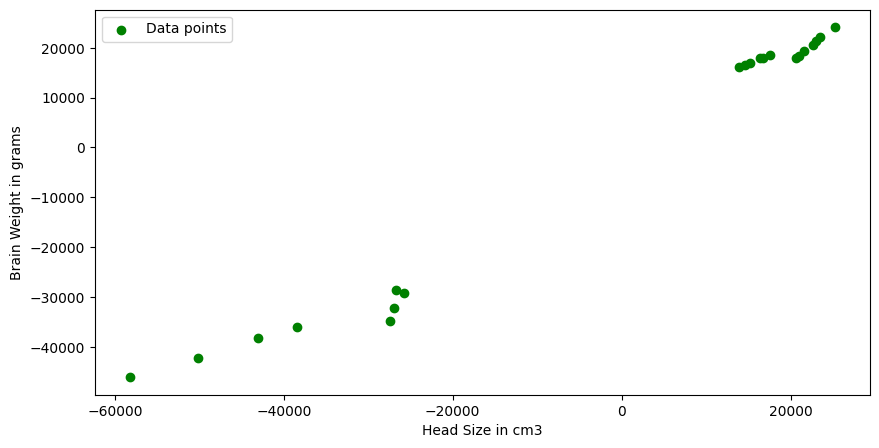

In [ ]:
# Plot the Input Data
plt.scatter(X, Y, c='green', label='Data points')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [ ]:
# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate theta1 and theta2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print("coefficients for regression",b1, b0)


# y = mx + c
# y =     b1x + b0
# y = - a/b*x + c/b
# b0 = c/b  -> b = c/b0
# b1 = -a/b -> a = -b1*b
# b1/b0 = -a/c

coefficients for regression 0.9390238979109956 125.07773970491735


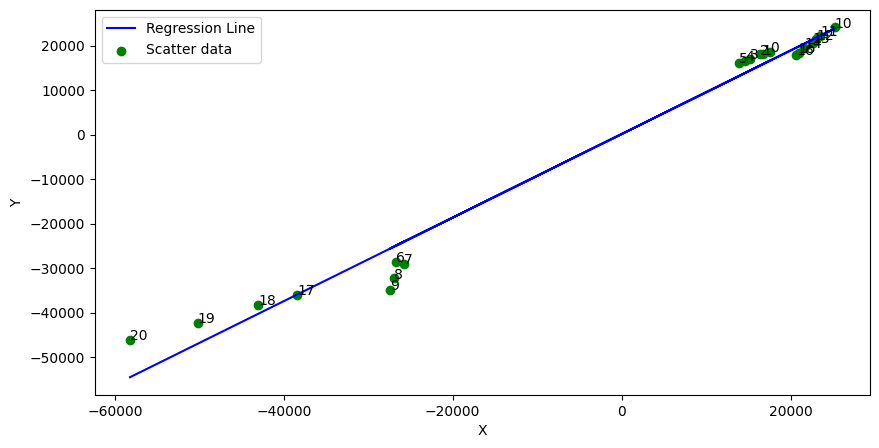

In [ ]:
# Plotting Values and Regression Line
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 5.0)
# max_x = np.max(X) + 100
# min_x = np.min(X) - 100

y = b0 + b1 * X

# Ploting Line
plt.plot(X, y, color='blue', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='green', label='Scatter data')
for i in range(len(X)):
    plt.text(X[i], Y[i], str(i))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


In [ ]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print("Root Mean Square Error is",rmse)

Root Mean Square Error is 3876.227885780147


In [ ]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score",r2)

R2 Score 0.9794468027438031


X: [ 17588.99104755  16725.82759799  16416.39164438  15243.79224121
  14604.19256675  13914.39013711 -26769.58637481 -25736.27261503
 -26948.84699785 -27398.97298257  25210.88716816  23483.67993916
  23021.23726224  22619.82074502  21629.70813006  20960.21433166
  20677.22109182 -38414.35644785 -42995.31144957 -50177.48279398
 -58203.57037553], Y: [ 18633.88160483  18034.08540021  18009.26924948  17024.75014662
  16585.15730106  16077.32008911 -28677.9133243  -29099.82507561
 -32285.25234396 -34859.08938871  24137.55236793  22204.86568505
  21380.11935839  20604.19315388  19423.90621184  18449.13914936
  17913.4341142  -36018.21342189 -38312.65376694 -42327.93598067
 -46101.83792121], C: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CLd = 0.007995027751214516, VL = -0.007507522122852037


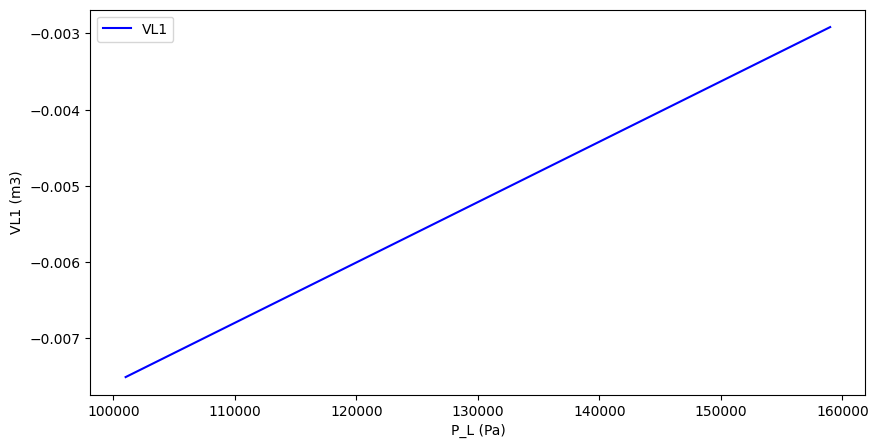

In [ ]:
X, Y, C = load_data()

CLd = 1/b0
VL = -CLd*b1
print("CLd = {}, VL = {}".format(CLd, VL))
# C_ = X*VL + Y*CLd 

# Plotting VL1
P_0 = 1.01*1e5  # Pa
P_L = np.arange(1.01*1e5, 1.60*1e5, 1e3) 
VL1 = VL + (P_L-P_0)/P_0*CLd

plt.plot(P_L, VL1, color='blue', label='VL1')
plt.xlabel('P_L (Pa)')
plt.ylabel('VL1 (m3)')
plt.legend()
plt.show()